In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
from nanonets import Simulation
from scipy.optimize import curve_fit
plt.style.use(["science","bright","grid"])

In [10]:
def get_linear_volt_ranges(n, ref_electrodes=[1,3], I_ref=1e-9, alpha=0.3):
    
    topo = {"Nx": n, "Ny": n,
            "e_pos" : [[0,0], [int((n-1)/2),0], [n-1,0], [0,int((n-1)/2)],
                       [0,n-1], [n-1,int((n)/2)], [int((n)/2),(n-1)], [n-1,n-1]],
            "electrode_type" : ['constant']*8}
    sim_class = Simulation(topology_parameter=topo)
    sim_class.build_conductance_matrix()
    sim_class.init_transfer_coeffs()
    sim_class.calibrate_electrodes(ref_electrodes, I_ref, alpha)

    return sim_class.get_delta_V()

In [11]:
N_vals   = np.arange(3,17)
alphas   = [0.3,0.5,0.8,1.0]
ref_idx  = [1,3]
data     = {alpha: pd.DataFrame(np.array([get_linear_volt_ranges(N, ref_idx, alpha=alpha) for N in N_vals])) for alpha in alphas}

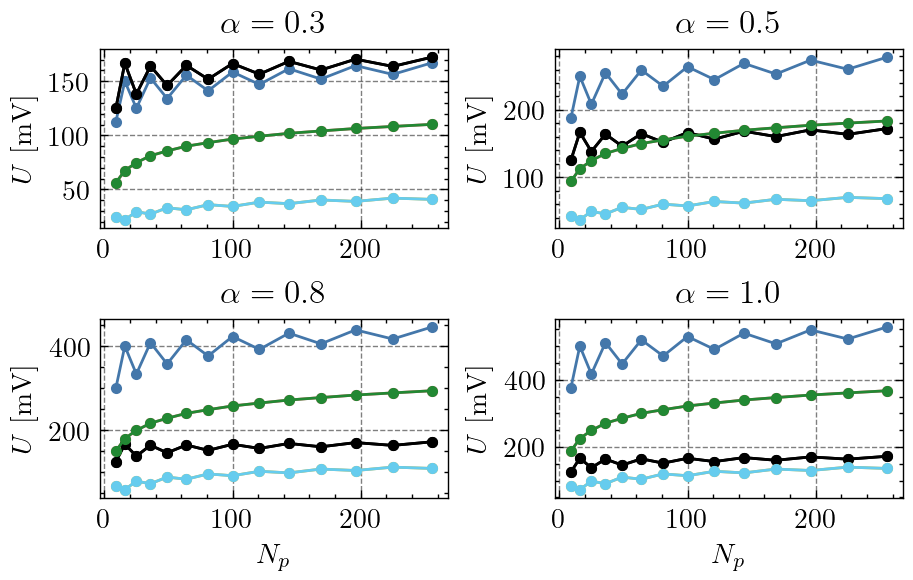

In [13]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.3)
fig.set_figheight(fig.get_figheight()*1.1)
for i, alpha in enumerate(alphas):
    ax = fig.add_subplot(2,2,i+1)
    for e in range(7):
        if e not in ref_idx:
            ax.plot(N_vals**2, data[alpha][e]*1000, '.-')
        else:
            ax.plot(N_vals**2, data[alpha][e]*1000, '.-', color='black')
    if i >= 2:
        ax.set_xlabel("$N_p$")
    ax.set_ylabel("$U$ [mV]")
    ax.set_title(f"$\\alpha = {alpha}$")

In [32]:
path = "/mnt/c/Users/jonas/Desktop/phd/data/1_funding_period/electrode_impact/voltage_sweep/"
data = {n : {i : pd.read_csv(f"{path}Nx=3_Ny=3_Ne=8_{i}.csv").loc[:,[f'E{i}','Observable','Error']] for i in [0,1,2,5]} for n in N_vals}

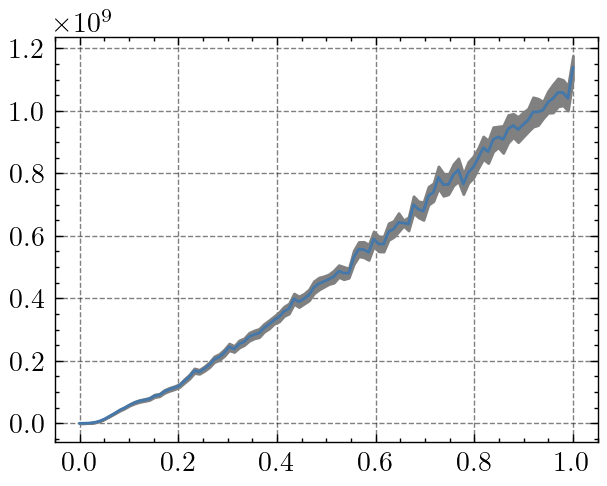

In [44]:
x   = data[5][0]['E0'].values
y   = data[5][0]['Observable'].values
y_e = data[5][0]['Error'].values

fig, ax = plt.subplots(dpi=200)
ax.plot(x, y)
ax.fill_between(x, y-y_e, y+y_e, color='grey')